Problem Statement:


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house


Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market

In [44]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [45]:
df1=pd.read_csv('Housing.csv',delim_whitespace=True)
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,2007,WD,Normal,128000,NaN,NaN,NaN,NaN,NaN
1,889,20,RL,95,15865,Pave,IR1,Lvl,AllPub,Inside,...,224,0,0,10,2007,WD,Normal,268000,NaN,NaN
2,793,60,RL,92,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,6,2007,WD,Normal,269790,NaN,NaN,NaN,NaN
3,110,20,RL,105,11751,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,0,1,2010,COD,Normal,190000,NaN,NaN,NaN
4,422,20,RL,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,6,2009,WD,Normal,215000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,2010,WD,Normal,122000,NaN,NaN,NaN,NaN,NaN
1164,554,20,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,...,108000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,196,160,RL,24,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,7,2009,WD,Normal,148500,NaN,NaN,NaN
1166,31,70,C,(all),50,8500,Pave,Pave,Reg,Lvl,...,0,MnPrv,0,7,2008,WD,Normal,40000,NaN,NaN


In [46]:
#1st 5 rows
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,2007,WD,Normal,128000,NaN,NaN,NaN,NaN,NaN
1,889,20,RL,95,15865,Pave,IR1,Lvl,AllPub,Inside,...,224,0,0,10,2007,WD,Normal,268000,NaN,NaN
2,793,60,RL,92,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,6,2007,WD,Normal,269790,NaN,NaN,NaN,NaN
3,110,20,RL,105,11751,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,0,1,2010,COD,Normal,190000,NaN,NaN,NaN
4,422,20,RL,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,6,2009,WD,Normal,215000,NaN,NaN,NaN,NaN,NaN


In [47]:
#last 5 line
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,2010,WD,Normal,122000,NaN,NaN,NaN,NaN,NaN
1164,554,20,RL,67,8777,Pave,Reg,Lvl,AllPub,Inside,...,108000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,196,160,RL,24,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,7,2009,WD,Normal,148500,NaN,NaN,NaN
1166,31,70,C,(all),50,8500,Pave,Pave,Reg,Lvl,...,0,MnPrv,0,7,2008,WD,Normal,40000,NaN,NaN
1167,617,60,RL,7861,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6,2006,WD,Normal,183200,NaN,NaN,NaN,NaN,NaN


In [48]:
df1.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
224,978,120,FV,35,4274,Pave,Pave,IR1,Lvl,AllPub,...,2007,New,Partial,199900,NaN,NaN,NaN,NaN,NaN,NaN


Data Descriptive Analysis

In [49]:
#checking the shape
df1.shape

(1168, 81)

In [50]:
# checking the datatypes
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage       object
LotArea           object
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [51]:
#Checking data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   object 
 4   LotArea        1168 non-null   object 
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   object 
 18  OverallC

In [52]:
#Checking data description for all numerical columns
df1.describe()

,Id,MSSubClass,OverallCond,LowQualFinSF,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,7.000000
mean,724.136130,56.767979,1841.324486,987.976027,165628.571429
std,416.159877,41.940650,495.384625,817.004817,50580.125026
min,1.000000,20.000000,2.000000,0.000000,110000.000000
25%,360.500000,20.000000,1950.000000,1.000000,126950.000000
50%,714.500000,50.000000,1972.000000,1080.000000,170000.000000
75%,1079.500000,70.000000,2001.000000,1594.750000,184750.000000
max,1460.000000,190.000000,2010.000000,5642.000000,256000.000000


In [53]:
#lets check the columns
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
#Checking for null values
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold            462
YrSold            908
SaleType         1064
SaleCondition    1132
SalePrice        1161
Length: 81, dtype: int64

In [55]:
#Checking for null values
df1.isnull().sum().sum()

5174

In [56]:
df1['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1163   NaN
1164   NaN
1165   NaN
1166   NaN
1167   NaN
Name: SalePrice, Length: 1168, dtype: float64

In [57]:
df2=pd.read_csv('housing_test.csv',delim_whitespace=True)
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86,14157,Pave,IR1,HLS,AllPub,Corner,...,0,0,7,2007,WD,Normal,NaN,NaN,NaN,NaN
1,1018,120,RL,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,8,2009,COD,Abnorml,NaN,NaN,NaN,NaN,NaN
2,929,20,RL,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,2009,WD,Normal,NaN,NaN,NaN,NaN,NaN
3,1148,70,RL,75,12000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,7,2009,WD,Normal,NaN,NaN,NaN,NaN
4,1227,60,RL,86,14598,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,1,2008,WD,Normal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78,10206,Pave,Reg,Lvl,AllPub,Inside,...,0,0,10,2008,WD,Normal,NaN,NaN,NaN,NaN
288,1048,20,RL,57,9245,Pave,IR2,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN
289,17,20,RL,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,Shed,700,3,2010,WD,Normal,NaN,NaN
290,523,50,RM,50,5000,Pave,Reg,Lvl,AllPub,Corner,...,0,0,10,2006,WD,Normal,NaN,NaN,NaN,NaN


In [58]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
df = [df1, df2]
  
df_final = pd.concat(df)
df_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,2007,WD,Normal,128000,NaN,NaN,NaN,NaN,NaN
1,889,20,RL,95,15865,Pave,IR1,Lvl,AllPub,Inside,...,224,0,0,10,2007,WD,Normal,268000,NaN,NaN
2,793,60,RL,92,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,6,2007,WD,Normal,269790,NaN,NaN,NaN,NaN
3,110,20,RL,105,11751,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,0,1,2010,COD,Normal,190000,NaN,NaN,NaN
4,422,20,RL,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,6,2009,WD,Normal,215000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78,10206,Pave,Reg,Lvl,AllPub,Inside,...,0,10,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN
288,1048,20,RL,57,9245,Pave,IR2,Lvl,AllPub,Inside,...,2,2008,WD,Normal,NaN,NaN,NaN,NaN,NaN,NaN
289,17,20,RL,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,Shed,700,3,2010,WD,Normal,NaN,NaN,NaN
290,523,50,RM,50,5000,Pave,Reg,Lvl,AllPub,Corner,...,0,10,2006,WD,Normal,NaN,NaN,NaN,NaN,NaN


In [60]:
df_final.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold            701
YrSold           1184
SaleType         1354
SaleCondition    1424
SalePrice        1453
Length: 81, dtype: int64

In [72]:
# Dropping columns which have high values missing + I
df_final.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'MoSold','Street', 'Utilities'], axis=1, inplace = True)

In [74]:
df_final.shape

(1460, 71)

In [75]:

# Converting years to age
df_final['YearBuilt_Age'] = df_final['YearBuilt'].max() - df_final['YearBuilt']
#data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
#data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
#data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']

# Dropping columns
#data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [73]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.00,190.0
OverallCond,1460.0,1848.021918,484.221985,2.0,1951.0,1974.0,2001.00,2010.0
LowQualFinSF,1460.0,990.252055,813.750032,0.0,1.0,1077.0,1594.75,5642.0
SalePrice,1460.0,169979.041096,3257.639164,110000.0,170000.0,170000.0,170000.00,256000.0


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

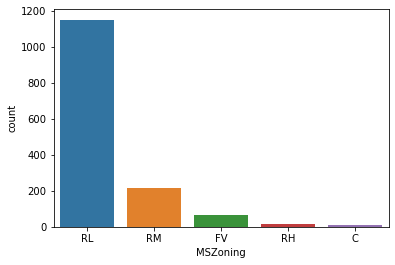

In [20]:
#Checking the content of each Categorical columns
print(df_final['MSZoning'].value_counts())
sns.countplot(df_final['MSZoning'])

60       139
70        70
80        69
50        55
75        53
        ... 
17600      1
9248       1
6897       1
13500      1
11241      1
Name: LotFrontage, Length: 346, dtype: int64


<AxesSubplot:xlabel='LotFrontage', ylabel='count'>

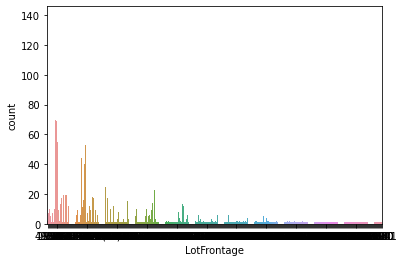

In [21]:
print(df_final['LotFrontage'].value_counts())
sns.countplot(df_final['LotFrontage'])

In [22]:
print(df_final['LotArea'].value_counts())
#sns.countplot(df_final['LotArea'])

Pave     258
7200      24
9600      24
6000      17
10800     14
        ... 
10437      1
8767       1
9590       1
12327      1
1953       1
Name: LotArea, Length: 873, dtype: int64


Pave     1190
IR1       165
Reg        71
IR2        15
Grvl        6
IR3         3
8712        2
11040       1
9000        1
7200        1
8470        1
7879        1
18000       1
8500        1
7500        1
Name: Street, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IR1'),
  Text(1, 0, 'Pave'),
  Text(2, 0, 'Reg'),
  Text(3, 0, 'IR2'),
  Text(4, 0, 'IR3'),
  Text(5, 0, '11040'),
  Text(6, 0, 'Grvl'),
  Text(7, 0, '8712'),
  Text(8, 0, '9000'),
  Text(9, 0, '7200'),
  Text(10, 0, '8470'),
  Text(11, 0, '7879'),
  Text(12, 0, '18000'),
  Text(13, 0, '8500'),
  Text(14, 0, '7500')])

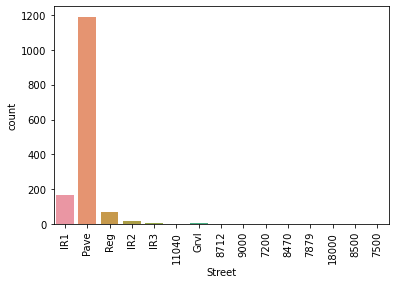

In [23]:
print(df_final['Street'].value_counts())
sns.countplot(df_final['Street'])
plt.xticks(rotation=90)

Reg     773
IR1     309
Lvl     226
Grvl     49
Pave     45
IR2      24
Low      19
IR3       6
Bnk       5
HLS       4
Name: Alley, dtype: int64


<AxesSubplot:xlabel='Alley', ylabel='count'>

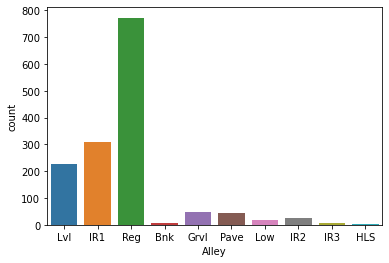

In [24]:
print(df_final['Alley'].value_counts())
sns.countplot(df_final['Alley'])

Lvl       1007
AllPub     253
Reg         79
Bnk         47
HLS         43
Low         15
IR1         10
Pave         2
IR2          2
IR3          1
NoSeWa       1
Name: LotShape, dtype: int64


<AxesSubplot:xlabel='LotShape', ylabel='count'>

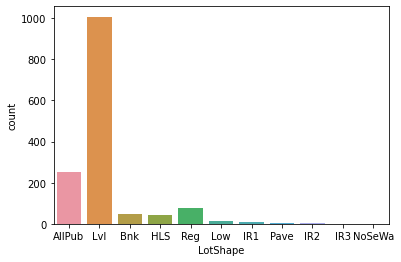

In [25]:
print(df_final['LotShape'].value_counts())
sns.countplot(df_final['LotShape'])

AllPub     1112
Inside      129
Lvl          77
Corner       62
CulDSac      49
FR2          14
Bnk          11
HLS           2
Low           2
Reg           2
Name: LandContour, dtype: int64


<AxesSubplot:xlabel='LandContour', ylabel='count'>

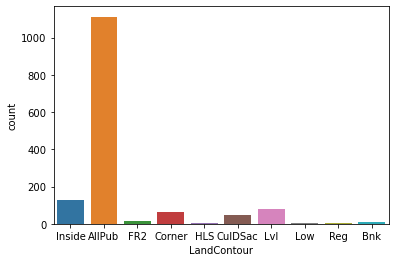

In [26]:
print(df_final['LandContour'].value_counts())
sns.countplot(df_final['LandContour'])

Inside     846
Gtl        229
Corner     184
AllPub      92
CulDSac     45
FR2         33
Mod         17
Sev          8
FR3          4
HLS          1
Lvl          1
Name: Utilities, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Gtl'),
  Text(1, 0, 'Inside'),
  Text(2, 0, 'CulDSac'),
  Text(3, 0, 'Corner'),
  Text(4, 0, 'AllPub'),
  Text(5, 0, 'Mod'),
  Text(6, 0, 'FR2'),
  Text(7, 0, 'Sev'),
  Text(8, 0, 'HLS'),
  Text(9, 0, 'FR3'),
  Text(10, 0, 'Lvl')])

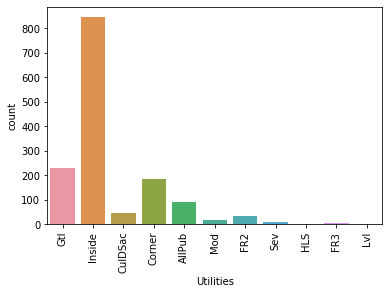

In [68]:
print(df_final['Utilities'].value_counts())
sns.countplot(df_final['Utilities'])
plt.xticks(rotation=90)

Gtl        1064
Inside       75
Mod          43
NAmes        39
Gilbert      30
NWAmes       28
Sawyer       26
CollgCr      24
Corner       17
ClearCr      15
Mitchel      13
Crawfor      10
SawyerW       9
Edwards       8
Timber        8
NoRidge       8
Somerst       8
StoneBr       5
BrkSide       5
Sev           5
Veenker       4
Blmngtn       3
SWISU         2
MeadowV       2
NPkVill       2
AllPub        2
OldTown       2
IDOTRR        2
NridgHt       1
Name: LotConfig, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'Mod'),
  Text(2, 0, 'Gtl'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Sawyer'),
  Text(5, 0, 'IDOTRR'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'NAmes'),
  Text(8, 0, 'Crawfor'),
  Text(9, 0, 'Inside'),
  Text(10, 0, 'OldTown'),
  Text(11, 0, 'Gilbert'),
  Text(12, 0, 'Mitchel'),
  Text(13, 0, 'Corner'),
  Text(14, 0, 'SawyerW'),
  Text(15, 0, 'CollgCr'),
  Text(16, 0, 'StoneBr'),
  Text(17, 0, 'ClearCr'),
  Text(18, 0, 'Timber'),
  Text(19, 0, 'BrkSide'),
  Text(20, 0, 'AllPub'),
  Text(21, 0, 'NoRidge'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'Somerst'),
  Text(24, 0, 'Veenker'),
  Text(25, 0, 'Sev'),
  Text(26, 0, 'SWISU'),
  Text(27, 0, 'MeadowV'),
  Text(28, 0, 'NridgHt')])

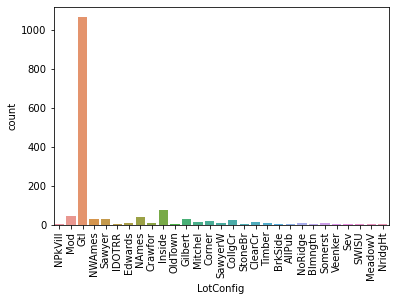

In [69]:
print(df_final['LotConfig'].value_counts())
sns.countplot(df_final['LotConfig'])
plt.xticks(rotation=90)

Norm       221
NAmes      185
CollgCr    126
Gtl         88
Edwards     86
NridgHt     76
OldTown     69
Somerst     54
SawyerW     50
BrkSide     50
Gilbert     49
Sawyer      48
NWAmes      45
Crawfor     40
Mitchel     36
NoRidge     33
Timber      30
IDOTRR      22
StoneBr     20
SWISU       19
BrDale      16
MeadowV     15
Feedr       14
Blmngtn     14
ClearCr     13
PosN         9
Veenker      7
NPkVill      7
Mod          4
PosA         4
Inside       2
RRAn         2
Blueste      2
RRAe         2
RRNe         1
RRNn         1
Name: LandSlope, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'Gtl'),
  Text(16, 0, 'Feedr'),
  Text(17, 0, 'OldTown'),
  Text(18, 0, 'Timber'),
  Text(19, 0, 'SWISU'),
  Text(20, 0, 'PosA'),
  Text(21, 0, 'SawyerW'),
  Text(22, 0, 'Somerst'),
  Text(23, 0, 'Veenker'),
  Text(24, 0, 'Mod'),
  Text(25, 0, 'PosN'),
  Text(26, 0, 'ClearCr'),
  Text(27, 0, 'Blmngtn'),
  Text(28, 0, 'Inside'),
  Text(29, 0, 'RRNe'),
  Text(30, 0, 'NPkVill'),
  Text(31, 0, 'MeadowV'),
  Text(32, 0, 'RRNn'),
  Text(33, 0, 'RR

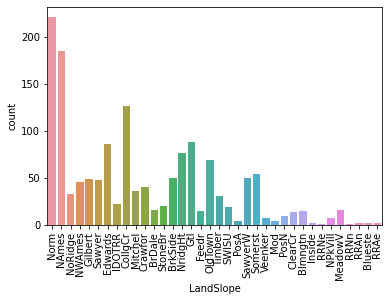

In [71]:
print(df_final['LandSlope'].value_counts())
sns.countplot(df_final['LandSlope'])
plt.xticks(rotation=90)

Norm       1210
Feedr        63
OldTown      42
Artery       39
RRAn         25
Somerst      24
IDOTRR       11
RRAe         10
PosN         10
Edwards       6
RRNn          4
SWISU         4
PosA          4
BrkSide       3
RRNe          1
Gtl           1
Crawfor       1
Mod           1
NAmes         1
Name: Neighborhood, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Feedr'),
  Text(2, 0, 'OldTown'),
  Text(3, 0, 'RRAe'),
  Text(4, 0, 'RRAn'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'IDOTRR'),
  Text(7, 0, 'Artery'),
  Text(8, 0, 'PosN'),
  Text(9, 0, 'Crawfor'),
  Text(10, 0, 'Mod'),
  Text(11, 0, 'RRNn'),
  Text(12, 0, 'BrkSide'),
  Text(13, 0, 'SWISU'),
  Text(14, 0, 'Edwards'),
  Text(15, 0, 'PosA'),
  Text(16, 0, 'RRNe'),
  Text(17, 0, 'Gtl'),
  Text(18, 0, 'NAmes')])

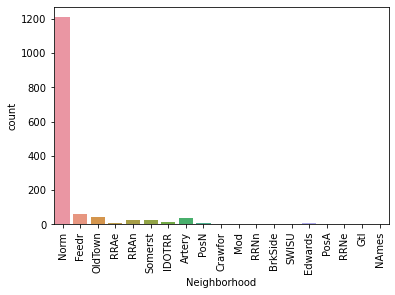

In [73]:
print(df_final['Neighborhood'].value_counts())
sns.countplot(df_final['Neighborhood'])
plt.xticks(rotation=90)

Norm      1180
1Fam       221
TwnhsE      22
Artery      11
Feedr        8
Duplex       5
Twnhs        3
2fmCon       3
IDOTRR       2
PosN         2
RRNn         2
PosA         1
Name: Condition1, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'TwnhsE'),
  Text(1, 0, 'Norm'),
  Text(2, 0, '1Fam'),
  Text(3, 0, 'Duplex'),
  Text(4, 0, 'Feedr'),
  Text(5, 0, 'IDOTRR'),
  Text(6, 0, 'Artery'),
  Text(7, 0, 'PosN'),
  Text(8, 0, 'Twnhs'),
  Text(9, 0, 'RRNn'),
  Text(10, 0, 'PosA'),
  Text(11, 0, '2fmCon')])

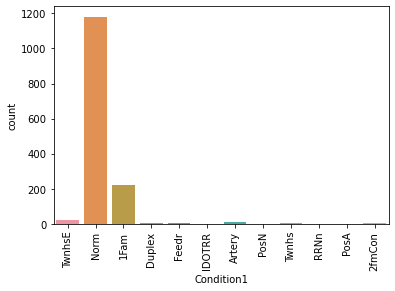

In [77]:
print(df_final['Condition1'].value_counts())
sns.countplot(df_final['Condition1'])
plt.xticks(rotation=90)

1Fam      934
1Story    128
Norm       92
2Story     82
TwnhsE     78
Duplex     45
Twnhs      35
SLvl       21
2fmCon     20
1.5Fin     15
SFoyer      7
Feedr       2
1.5Unf      1
Name: Condition2, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1Story'),
  Text(1, 0, '1Fam'),
  Text(2, 0, 'TwnhsE'),
  Text(3, 0, 'Norm'),
  Text(4, 0, '1.5Fin'),
  Text(5, 0, '2Story'),
  Text(6, 0, 'SFoyer'),
  Text(7, 0, 'Twnhs'),
  Text(8, 0, '2fmCon'),
  Text(9, 0, 'Duplex'),
  Text(10, 0, 'SLvl'),
  Text(11, 0, '1.5Unf'),
  Text(12, 0, 'Feedr')])

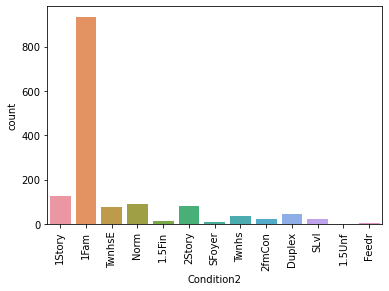

In [78]:
print(df_final['Condition2'].value_counts())
sns.countplot(df_final['Condition2'])
plt.xticks(rotation=90)

1Story    573
2Story    325
1.5Fin    114
6          89
5          63
1Fam       63
7          53
SLvl       44
SFoyer     29
8          25
4          18
TwnhsE     14
1.5Unf     12
2fmCon      8
2.5Unf      8
2.5Fin      7
Twnhs       5
3           3
Norm        2
Duplex      2
9           1
10          1
1           1
Name: BldgType, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '6'),
  Text(1, 0, '1Story'),
  Text(2, 0, '2Story'),
  Text(3, 0, '5'),
  Text(4, 0, '1.5Fin'),
  Text(5, 0, 'SFoyer'),
  Text(6, 0, '1.5Unf'),
  Text(7, 0, '1Fam'),
  Text(8, 0, 'TwnhsE'),
  Text(9, 0, 'SLvl'),
  Text(10, 0, '7'),
  Text(11, 0, '8'),
  Text(12, 0, '2.5Fin'),
  Text(13, 0, '9'),
  Text(14, 0, '4'),
  Text(15, 0, '3'),
  Text(16, 0, 'Norm'),
  Text(17, 0, '2fmCon'),
  Text(18, 0, 'Twnhs'),
  Text(19, 0, '2.5Unf'),
  Text(20, 0, '10'),
  Text(21, 0, 'Duplex'),
  Text(22, 0, '1')])

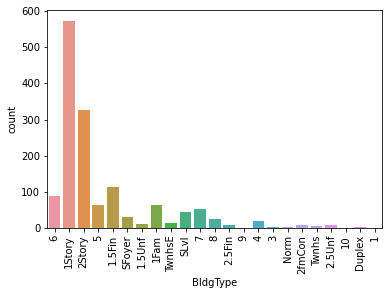

In [80]:
print(df_final['BldgType'].value_counts())
sns.countplot(df_final['BldgType'])
plt.xticks(rotation=90)

5         444
6         311
7         281
8         149
4          94
9          49
2Story     37
1Story     25
1.5Fin     24
3          17
10         17
2.5Unf      3
1           2
2           2
1Fam        2
1.5Unf      1
2.5Fin      1
SFoyer      1
Name: HouseStyle, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '5'),
  Text(1, 0, '8'),
  Text(2, 0, '7'),
  Text(3, 0, '6'),
  Text(4, 0, '9'),
  Text(5, 0, '2Story'),
  Text(6, 0, '1'),
  Text(7, 0, '1.5Fin'),
  Text(8, 0, '2'),
  Text(9, 0, '4'),
  Text(10, 0, '1Story'),
  Text(11, 0, '3'),
  Text(12, 0, '10'),
  Text(13, 0, '1Fam'),
  Text(14, 0, '2.5Unf'),
  Text(15, 0, '1.5Unf'),
  Text(16, 0, '2.5Fin'),
  Text(17, 0, 'SFoyer')])

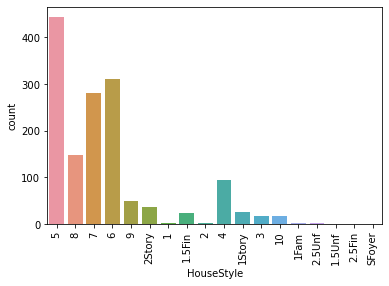

In [81]:
print(df_final['HouseStyle'].value_counts())
sns.countplot(df_final['HouseStyle'])
plt.xticks(rotation=90)


5       521
6       175
5       153
7       143
8        48
       ... 
1985      1
1974      1
1950      1
2003      1
1975      1
Name: OverallQual, Length: 111, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 [Text(0, 0, '1976'),
  Text(1, 0, '6'),
  Text(2, 0, '5'),
  Text(3, 0, '1977'),
  Text(4, 0, '1957'),
  Text(5, 0, '4'),
  Text(6, 0, '7'),
  Text(7, 0, '1930'),
  Text(8, 0, '1961'),
  Text(9, 0, '8'),
  Text(10, 0, '1953'),
  Text(11, 0, '1918'),
  Text(12, 0, '2'),
  Text(13, 0, '1941'),
  Text(14, 0, '1948'),
  Text(15, 0, '1978'),
  Text(16, 0, '3'),
  Text(17, 

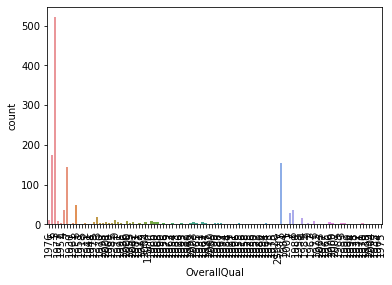

In [82]:
print(df_final['OverallQual'].value_counts())
sns.countplot(df_final['OverallQual'])
plt.xticks(rotation=90)


Gable    202
1950     128
2006      95
2005      68
2007      65
        ... 
1917       1
1949       1
1921       1
7          1
1885       1
Name: YearBuilt, Length: 101, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, 'Gable'),
  Text(1, 0, '1970'),
  Text(2, 0, '1997'),
  Text(3, 0, '1977'),
  Text(4, 0, '2006'),
  Text(5, 0, 'Hip'),
  Text(6, 0, '2000'),
  Text(7, 0, '1965'),
  Text(8, 0, '1950'),
  Text(9, 0, '2003'),
  Text(10, 0, '1960'),
  Text(11, 0, '1955'),
  Text(12, 0, '1996'),
  Text(13, 0, '2007'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2010'),
  Text(17, 0, '1995'),
  Text(18, 0, '2005'),
  

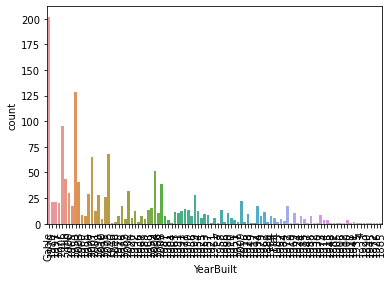

In [84]:
print(df_final['YearBuilt'].value_counts())
sns.countplot(df_final['YearBuilt'])
plt.xticks(rotation=90)


Gable      858
CompShg    246
Hip        235
1950        30
2000         9
2005         8
Flat         7
Gambrel      7
2007         6
Mansard      5
Tar&Grv      4
2004         4
1995         3
1998         3
1999         3
2006         3
WdShake      3
2002         2
2009         2
1952         2
1991         1
1981         1
1994         1
1960         1
1920         1
2003         1
1993         1
1954         1
1989         1
Metal        1
1982         1
1900         1
2001         1
1953         1
1986         1
1973         1
1980         1
1992         1
1990         1
1987         1
Name: YearRemodAdd, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'Flat'),
  Text(2, 0, 'Gable'),
  Text(3, 0, 'Hip'),
  Text(4, 0, '1992'),
  Text(5, 0, '2005'),
  Text(6, 0, '1950'),
  Text(7, 0, '2002'),
  Text(8, 0, 'Gambrel'),
  Text(9, 0, '1990'),
  Text(10, 0, 'WdShake'),
  Text(11, 0, '2006'),
  Text(12, 0, '1900'),
  Text(13, 0, '2007'),
  Text(14, 0, '2000'),
  Text(15, 0, '1991'),
  Text(16, 0, '2004'),
  Text(17, 0, 'Tar&Grv'),
  Text(18, 0, '1998'),
  Text(19, 0, 'Mansard'),
  Text(20, 0, '1999'),
  Text(21, 0, '1995'),
  Text(22, 0, '1980'),
  Text(23, 0, '1973'),
  Text(24, 0, '1986'),
  Text(25, 0, '1953'),
  Text(26, 0, '2001'),
  Text(27, 0, 'Metal'),
  Text(28, 0, '1952'),
  Text(29, 0, '1982'),
  Text(30, 0, '1981'),
  Text(31, 0, '2009'),
  Text(32, 0, '1989'),
  Text(33, 0, '1954'),
  Text(34, 0, '1993'),
  T

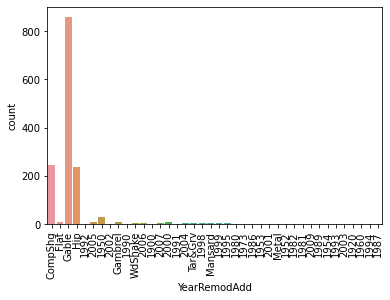

In [85]:
print(df_final['YearRemodAdd'].value_counts())
sns.countplot(df_final['YearRemodAdd'])
plt.xticks(rotation=90)


CompShg    1094
Gable        80
VinylSd      68
HdBoard      62
Plywood      37
Wd           37
MetalSd      28
BrkFace       9
CemntBd       7
Tar&Grv       7
Hip           7
WdShngl       6
Gambrel       3
Stucco        3
1950          2
WdShake       2
Mansard       2
Roll          1
WdShing       1
ClyTile       1
Membran       1
AsbShng       1
Stone         1
Name: RoofStyle, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Tar&Grv'),
  Text(2, 0, 'CompShg'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'Wd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Gable'),
  Text(7, 0, 'MetalSd'),
  Text(8, 0, 'VinylSd'),
  Text(9, 0, 'WdShngl'),
  Text(10, 0, '1950'),
  Text(11, 0, 'BrkFace'),
  Text(12, 0, 'Hip'),
  Text(13, 0, 'Roll'),
  Text(14, 0, 'Gambrel'),
  Text(15, 0, 'Stucco'),
  Text(16, 0, 'WdShing'),
  Text(17, 0, 'WdShake'),
  Text(18, 0, 'ClyTile'),
  Text(19, 0, 'Membran'),
  Text(20, 0, 'AsbShng'),
  Text(21, 0, 'Mansard'),
  Text(22, 0, 'Stone')])

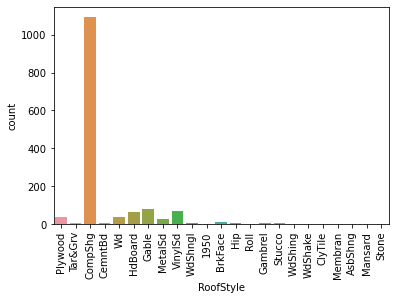

In [86]:
print(df_final['RoofStyle'].value_counts())
sns.countplot(df_final['RoofStyle'])
plt.xticks(rotation=90)

VinylSd    495
HdBoard    217
MetalSd    188
Wd         149
Plywood    115
CompShg     92
CemntBd     54
BrkFace     41
Sdng        37
WdShing     24
Stucco      19
AsbShng     14
CmentBd      6
ImStucc      2
BrkComm      2
Gable        1
Stone        1
AsphShn      1
Gambrel      1
CBlock       1
Name: RoofMatl, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'Sdng'),
  Text(6, 0, 'HdBoard'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'CompShg'),
  Text(9, 0, 'WdShing'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'CemntBd'),
  Text(12, 0, 'Gable'),
  Text(13, 0, 'Stone'),
  Text(14, 0, 'AsbShng'),
  Text(15, 0, 'AsphShn'),
  Text(16, 0, 'ImStucc'),
  Text(17, 0, 'BrkComm'),
  Text(18, 0, 'Gambrel'),
  Text(19, 0, 'CBlock')])

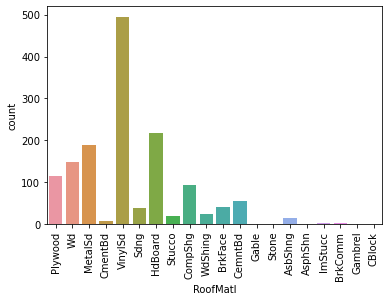

In [87]:
print(df_final['RoofMatl'].value_counts())
sns.countplot(df_final['RoofMatl'])
plt.xticks(rotation=90)

VinylSd    437
MetalSd    185
HdBoard    149
Sdng       147
BrkFace    114
None       106
Wd          97
Plywood     92
CmentBd     54
Stucco      19
AsbShng     19
Stone       13
Brk          7
ImStucc      6
BrkCmn       4
AsphShn      3
CompShg      2
Shng         2
WdShing      1
Other        1
Gd           1
CBlock       1
Name: Exterior1st, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'None'),
  Text(1, 0, 'Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'Plywood'),
  Text(4, 0, 'Stone'),
  Text(5, 0, 'VinylSd'),
  Text(6, 0, 'Wd'),
  Text(7, 0, 'BrkFace'),
  Text(8, 0, 'HdBoard'),
  Text(9, 0, 'Stucco'),
  Text(10, 0, 'ImStucc'),
  Text(11, 0, 'CmentBd'),
  Text(12, 0, 'AsbShng'),
  Text(13, 0, 'CompShg'),
  Text(14, 0, 'WdShing'),
  Text(15, 0, 'BrkCmn'),
  Text(16, 0, 'Brk'),
  Text(17, 0, 'Shng'),
  Text(18, 0, 'AsphShn'),
  Text(19, 0, 'Other'),
  Text(20, 0, 'Gd'),
  Text(21, 0, 'CBlock')])

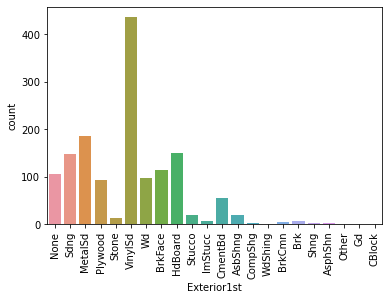

In [89]:
print(df_final['Exterior1st'].value_counts())
sns.countplot(df_final['Exterior1st'])
plt.xticks(rotation=90)

None       505
BrkFace    307
Wd         133
Stone      112
0          104
          ... 
432          1
600          1
210          1
28           1
456          1
Name: Exterior2nd, Length: 109, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Wd'),
  Text(2, 0, 'None'),
  Text(3, 0, 'BrkFace'),
  Text(4, 0, '126'),
  Text(5, 0, 'Sdng'),
  Text(6, 0, 'BrkCmn'),
  Text(7, 0, 'Stone'),
  Text(8, 0, '174'),
  Text(9, 0, 'Shng'),
  Text(10, 0, 'HdBoard'),
  Text(11, 0, '1'),
  Text(12, 0, 'MetalSd'),
  Text(13, 0, '287'),
  Text(14, 0, 'Gd'),
  Text(15, 0, 'Ex'),
  Text(16, 0, '396'),
  Te

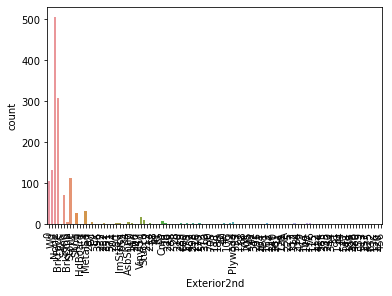

In [90]:
print(df_final['Exterior2nd'].value_counts())
sns.countplot(df_final['Exterior2nd'])
plt.xticks(rotation=90)

TA         712
Gd         380
0          118
None       111
Ex          43
Sdng        23
BrkFace     21
PConc        6
Fa           5
180          3
BrkCmn       3
106          3
76           2
85           2
456          2
Shng         2
72           1
336          1
207          1
603          1
145          1
1600         1
335          1
57           1
151          1
Stone        1
184          1
360          1
286          1
68           1
120          1
1129         1
116          1
894          1
30           1
212          1
651          1
259          1
491          1
621          1
Name: MasVnrArea, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Gd'),
  Text(3, 0, '180'),
  Text(4, 0, 'BrkCmn'),
  Text(5, 0, '0'),
  Text(6, 0, '184'),
  Text(7, 0, 'Ex'),
  Text(8, 0, 'Fa'),
  Text(9, 0, 'Sdng'),
  Text(10, 0, 'PConc'),
  Text(11, 0, 'BrkFace'),
  Text(12, 0, '286'),
  Text(13, 0, '120'),
  Text(14, 0, '212'),
  Text(15, 0, '651'),
  Text(16, 0, '72'),
  Text(17, 0, '336'),
  Text(18, 0, '491'),
  Text(19, 0, '259'),
  Text(20, 0, 'Shng'),
  Text(21, 0, '106'),
  Text(22, 0, '30'),
  Text(23, 0, '894'),
  Text(24, 0, '116'),
  Text(25, 0, '1129'),
  Text(26, 0, '456'),
  Text(27, 0, '68'),
  Text(28, 0, '85'),
  Text(29, 0, '360'),
  Text(30, 0, '76'),
  Text(31, 0, 'Stone'),
  Text(32, 0, '151'),
  Text(33, 0, '57'),
  Text(34, 0, '335'),
  Text(35, 0, '1600'),
  Text(36, 0, '145'),
  Text

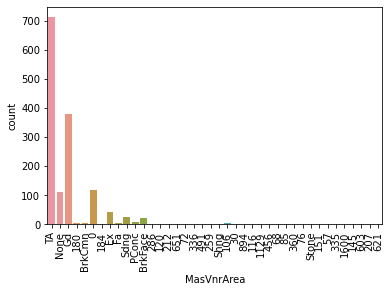

In [92]:
print(df_final['MasVnrArea'].value_counts())
sns.countplot(df_final['MasVnrArea'])
plt.xticks(rotation=90)

TA         937
Gd         128
CBlock     111
0          110
PConc       94
None        24
Fa          18
Ex           5
Slab         3
BrkTil       2
216          2
BrkFace      1
45           1
340          1
Wood         1
1            1
261          1
650          1
74           1
132          1
175          1
183          1
102          1
101          1
300          1
70           1
44           1
252          1
104          1
120          1
399          1
98           1
90           1
237          1
320          1
67           1
176          1
Name: ExterQual, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'CBlock'),
  Text(1, 0, '0'),
  Text(2, 0, 'TA'),
  Text(3, 0, '67'),
  Text(4, 0, 'Gd'),
  Text(5, 0, 'Slab'),
  Text(6, 0, 'Fa'),
  Text(7, 0, 'None'),
  Text(8, 0, 'Ex'),
  Text(9, 0, 'PConc'),
  Text(10, 0, '320'),
  Text(11, 0, '237'),
  Text(12, 0, '90'),
  Text(13, 0, '98'),
  Text(14, 0, '399'),
  Text(15, 0, '120'),
  Text(16, 0, '104'),
  Text(17, 0, '252'),
  Text(18, 0, '102'),
  Text(19, 0, '44'),
  Text(20, 0, '70'),
  Text(21, 0, '300'),
  Text(22, 0, '101'),
  Text(23, 0, '74'),
  Text(24, 0, '183'),
  Text(25, 0, 'BrkTil'),
  Text(26, 0, '45'),
  Text(27, 0, '216'),
  Text(28, 0, '340'),
  Text(29, 0, 'BrkFace'),
  Text(30, 0, '1'),
  Text(31, 0, '261'),
  Text(32, 0, '650'),
  Text(33, 0, 'Wood'),
  Text(34, 0, '132'),
  Text(35, 0, '175'),
  Text(36, 0, '176')])

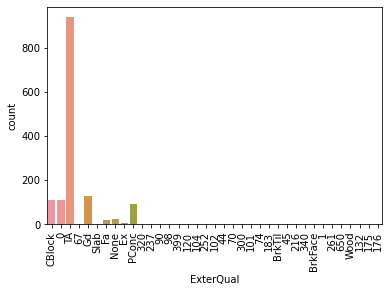

In [93]:
print(df_final['ExterQual'].value_counts())
sns.countplot(df_final['ExterQual'])
plt.xticks(rotation=90)

PConc     474
CBlock    386
TA        329
Gd        152
BrkTil     51
0          28
Slab       15
Fa         13
Ex          7
Po          1
No          1
360         1
Stone       1
Wood        1
Name: ExterCond, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Gd'),
  Text(1, 0, 'PConc'),
  Text(2, 0, 'CBlock'),
  Text(3, 0, 'TA'),
  Text(4, 0, 'BrkTil'),
  Text(5, 0, '0'),
  Text(6, 0, 'Slab'),
  Text(7, 0, 'Ex'),
  Text(8, 0, 'Fa'),
  Text(9, 0, 'Po'),
  Text(10, 0, 'No'),
  Text(11, 0, '360'),
  Text(12, 0, 'Stone'),
  Text(13, 0, 'Wood')])

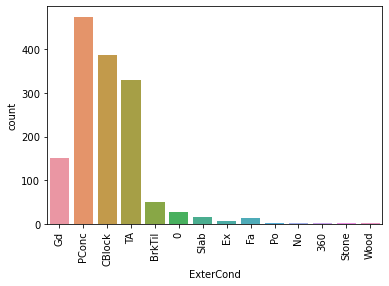

In [94]:
print(df_final['ExterCond'].value_counts())
sns.countplot(df_final['ExterCond'])
plt.xticks(rotation=90)

TA        688
Gd        452
Ex        107
CBlock     65
PConc      45
BrkTil     35
0          28
Fa         26
No          5
Slab        5
Stone       3
GLQ         1
Name: Foundation, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'CBlock'),
  Text(3, 0, 'Ex'),
  Text(4, 0, 'BrkTil'),
  Text(5, 0, '0'),
  Text(6, 0, 'PConc'),
  Text(7, 0, 'No'),
  Text(8, 0, 'Fa'),
  Text(9, 0, 'Slab'),
  Text(10, 0, 'Stone'),
  Text(11, 0, 'GLQ')])

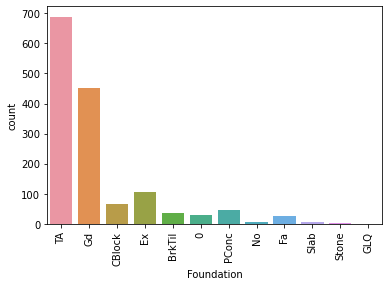

In [95]:
print(df_final['Foundation'].value_counts())
sns.countplot(df_final['Foundation'])
plt.xticks(rotation=90)

TA        955
No        128
Gd        119
CBlock     65
BrkTil     45
0          34
Av         33
PConc      22
Fa         21
Mn         20
Ex          6
GLQ         3
Unf         2
Stone       2
Po          1
625         1
Rec         1
Wood        1
Slab        1
Name: BsmtQual, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'PConc'),
  Text(2, 0, 'TA'),
  Text(3, 0, 'Gd'),
  Text(4, 0, 'CBlock'),
  Text(5, 0, 'Fa'),
  Text(6, 0, '0'),
  Text(7, 0, 'Av'),
  Text(8, 0, 'BrkTil'),
  Text(9, 0, 'Rec'),
  Text(10, 0, 'GLQ'),
  Text(11, 0, 'Unf'),
  Text(12, 0, 'Ex'),
  Text(13, 0, 'Mn'),
  Text(14, 0, 'Stone'),
  Text(15, 0, 'Wood'),
  Text(16, 0, 'Po'),
  Text(17, 0, '625'),
  Text(18, 0, 'Slab')])

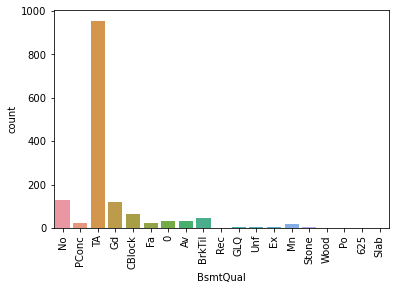

In [96]:
print(df_final['BsmtQual'].value_counts())
sns.countplot(df_final['BsmtQual'])
plt.xticks(rotation=90)

No        585
TA        232
Av        166
Gd        113
GLQ        71
Mn         65
Unf        44
ALQ        41
0          39
BLQ        31
Fa         19
BrkTil     13
Rec        12
LwQ        10
CBlock      7
PConc       5
Ex          2
Po          1
1219        1
804         1
1386        1
833         1
Name: BsmtCond, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'ALQ'),
  Text(1, 0, 'TA'),
  Text(2, 0, 'Av'),
  Text(3, 0, 'No'),
  Text(4, 0, 'BLQ'),
  Text(5, 0, 'Mn'),
  Text(6, 0, 'GLQ'),
  Text(7, 0, 'Rec'),
  Text(8, 0, '0'),
  Text(9, 0, 'Gd'),
  Text(10, 0, 'BrkTil'),
  Text(11, 0, '1219'),
  Text(12, 0, '1386'),
  Text(13, 0, 'Unf'),
  Text(14, 0, 'Fa'),
  Text(15, 0, 'LwQ'),
  Text(16, 0, 'PConc'),
  Text(17, 0, '804'),
  Text(18, 0, 'CBlock'),
  Text(19, 0, 'Po'),
  Text(20, 0, 'Ex'),
  Text(21, 0, '833')])

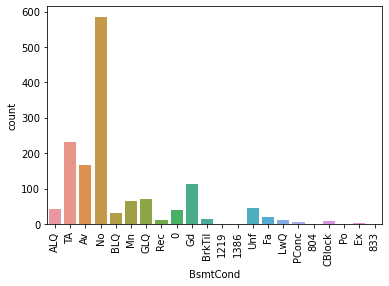

In [97]:
print(df_final['BsmtCond'].value_counts())
sns.countplot(df_final['BsmtCond'])
plt.xticks(rotation=90)

Y        873
SBrkr    203
GasA     127
Ex        62
TA        50
        ... 
916        1
482        1
742        1
684        1
1588       1
Name: HeatingQC, Length: 65, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, 'SBrkr'),
  Text(1, 0, 'GasA'),
  Text(2, 0, 'Y'),
  Text(3, 0, 'TA'),
  Text(4, 0, 'Ex'),
  Text(5, 0, 'Gd'),
  Text(6, 0, '0'),
  Text(7, 0, '334'),
  Text(8, 0, 'GasW'),
  Text(9, 0, '930'),
  Text(10, 0, '951'),
  Text(11, 0, '827'),
  Text(12, 0, '2515'),
  Text(13, 0, 'N'),
  Text(14, 0, '2076'),
  Text(15, 0, '2020'),
  Text(16, 0, '822'),
  Text(17, 0, '728'),
  Text(18, 0, '876'),
  Text(19, 0, '1428'),
  Text(20, 0, 'FuseA'),
  Text(21, 0, 'Fa'),
  Text(22, 0, '1771'),
  Text(23, 0, '764'),
  Text(24, 0, '1128'),
  Text(25, 0, 'FuseF'),
  Text(26, 0, 'Grav'),
  Text(27, 0, '1922'),
  Text(28, 0, '264'),
  Text(29, 0, '1664'),
  Text(30, 0, '637'),
  Text(31, 0, '2240'),
  Te

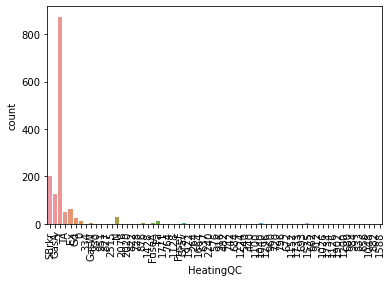

In [107]:
print(df_final['HeatingQC'].value_counts())
sns.countplot(df_final['HeatingQC'])
plt.xticks(rotation=90)

GLQ     308
Unf     264
ALQ     143
TA      135
No      110
       ... 
1059      1
619       1
196       1
1231      1
280       1
Name: BsmtExposure, Length: 161, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160]),
 [Text(0, 0, '120'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'GLQ'),
  Text(3, 0, 'BLQ'),
  Text

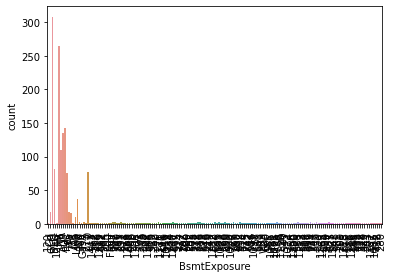

In [99]:
print(df_final['BsmtExposure'].value_counts())
sns.countplot(df_final['BsmtExposure'])
plt.xticks(rotation=90)

0       273
Unf     228
No      102
Rec      30
GLQ      27
       ... 
486       1
167       1
512       1
1000      1
309       1
Name: BsmtFinType1, Length: 485, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

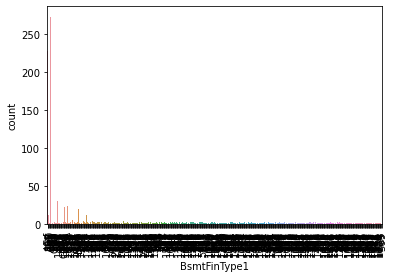

In [100]:
print(df_final['BsmtFinType1'].value_counts())
sns.countplot(df_final['BsmtFinType1'])
plt.xticks(rotation=90)

Unf     865
0       231
Rec      51
LwQ      45
BLQ      32
       ... 
Wall      1
507       1
1173      1
152       1
578       1
Name: BsmtFinSF1, Length: 143, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]),
 [Text(0, 0, '0'),
  Text(1, 0, 'ALQ'),
  Text(2, 0, 'Unf'),
  Text(3, 0, '1302'),
  Text(4, 0, 'Rec'),
  Text(5, 0, 'GLQ'),
  Text(6, 0, '538'),
  Text(7, 0, '656'),
  Text(8, 0, '915'),
  Text(

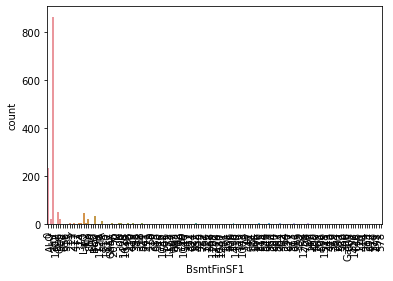

In [101]:
print(df_final['BsmtFinSF1'].value_counts())
sns.countplot(df_final['BsmtFinSF1'])
plt.xticks(rotation=90)

Ex      508
TA      238
Y       209
GasA    138
Gd      137
       ... 
1026      1
441       1
764       1
1106      1
1215      1
Name: Heating, Length: 147, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]),
 [Text(0, 0, 'Y'),
  Text(1, 0, '2217'),
  Text(2, 0, 'Ex'),
  Text(3, 0, 'GasA'),
  Text(4, 0, '1134'),
  Text(5, 0, 'TA'),
  Text(6, 0, 'Gd'),
  Text(7, 0, '602'),
 

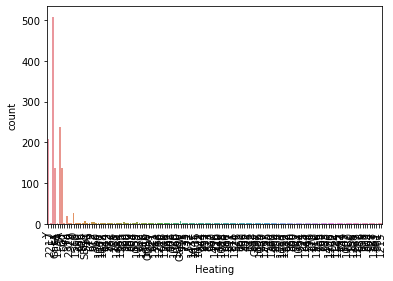

In [106]:
print(df_final['Heating'].value_counts())
sns.countplot(df_final['Heating'])
plt.xticks(rotation=90)

0        149
SBrkr    119
Y        109
N         24
FuseA     21
        ... 
677        1
1163       1
755        1
1319       1
1563       1
Name: Electrical, Length: 633, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

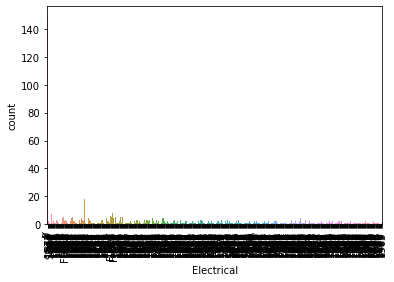

In [109]:
print(df_final['Electrical'].value_counts())
sns.countplot(df_final['Electrical'])
plt.xticks(rotation=90)

Updating Null values

In [34]:
df_final.shape

(1460, 81)

In [35]:
df_final.isnull().sum().iloc[-1]

1453

In [65]:
def treat_Missing_Values(df):    
    
    # checking null values
    NA_col = df.isnull().sum()
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(df_final[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [67]:
df_final = treat_Missing_Values(df_final)

In [68]:
df_final.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [83]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = df_final[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        df_final[colName] = df_final[colName].map(map_vals)

In [86]:
cat_col_list = ['LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual','YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition']
                
               
label_encoding(cat_col_list)

In [87]:
df_final[cat_col_list].head()

,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,1,1,0,1,0
2,2,1,1,2,2,0,1,1,2,2,...,2,0,0,0,0,2,2,0,0,0
3,3,1,1,2,3,0,1,1,1,3,...,3,0,0,0,0,3,3,1,0,0
4,0,0,2,3,0,0,2,0,0,2,...,0,0,0,0,0,4,4,0,0,0


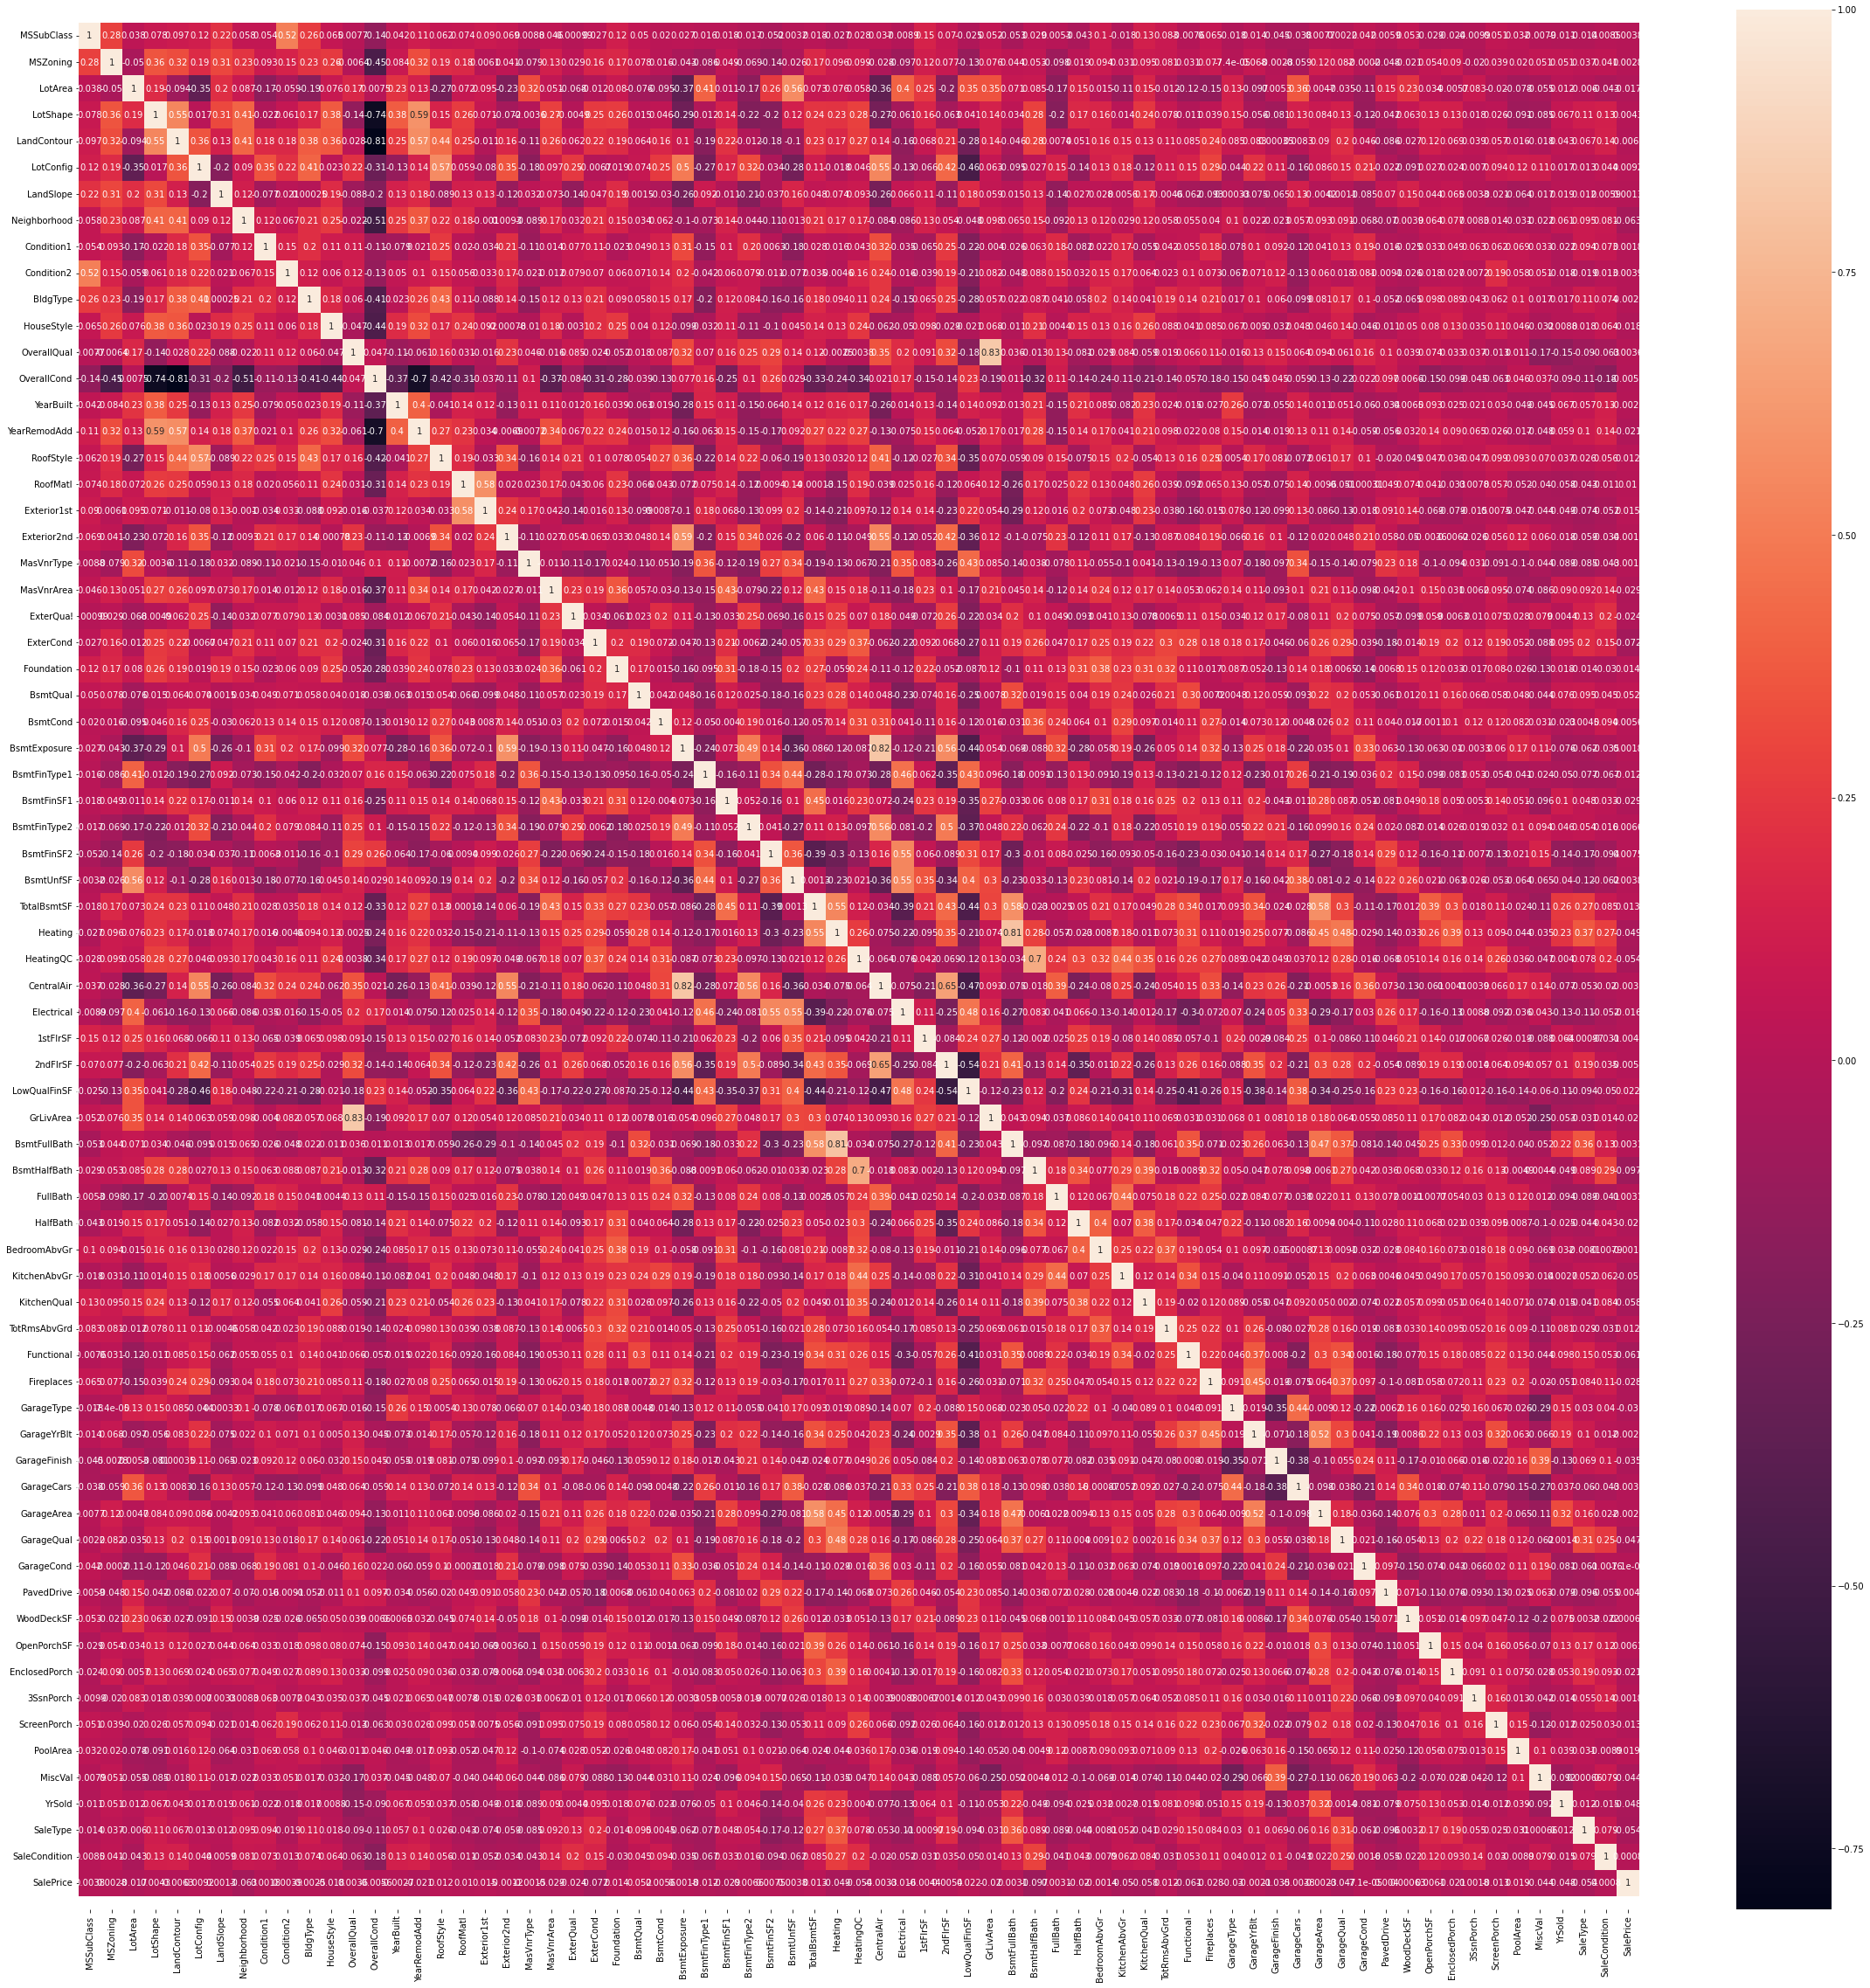

In [89]:
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(df_final.corr(), 
            xticklabels=df_final.corr().columns.values,
            yticklabels=df_final.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [90]:
df_final.shape

(1460, 71)

In [94]:
df_final.columns


Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scree

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
x=df_final.iloc[:,0:-1]
x.shape

(1460, 70)

In [99]:
y=df_final.iloc[:,-1]
y.shape

(1460,)

In [100]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled

array([[ 1.49228154, -0.4469447 , -1.12184563, ..., -0.30870142,
        -0.20227769, -0.12402742],
       [-0.87256276, -0.4469447 , -1.11817845, ..., -0.30870142,
        -0.07932789, -0.12402742],
       [ 0.07337496, -0.4469447 , -1.11451126, ..., -0.30870142,
        -0.20227769, -0.12402742],
       ...,
       [-0.87256276, -0.4469447 , -1.12184563, ..., -0.30870142,
        -0.20227769, -0.12402742],
       [-0.16310947,  1.04970499, -0.98615967, ..., -0.30870142,
        -0.20227769, -0.12402742],
       [ 2.43821926,  1.04970499,  2.07594252, ..., -0.30870142,
        -0.20227769, -0.12402742]])

In [91]:
#for filling the null values in target column
from sklearn.cluster import KMeans

In [108]:
clustering = KMeans(n_clusters=3,random_state=5)
#fit the dataset
clustering.fit(x_scaled)
target=pd.DataFrame('SalePrice')

df_final = pd.DataFrame (x_scaled)
df_final.columns = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition']
target.columns =['target']


#https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/

ValueError: DataFrame constructor not properly called!

In [ ]:
https://www.kaggle.com/code/niladrib/surprise-housing-ridge-and-lasso-regression/notebook

bservation Based on the above data, we can drop the following columns - LotFrontage - Alley - FireplaceQu - PoolQC - Fence - MiscFeature - Id (dropping this not because of count, irrelevant) - MoSold (dropping this not because of count, irrelevant) - Street (dropping this not because of count, irrelevant) - Utilities (dropping this not because of count, irrelevant)